## 항공기 운항 정보
#### https://www.data.go.kr/dataset/15000126/openapi.do?mypageFlag=Y

In [1]:
import pandas as pd
import requests
import numpy as np

In [5]:
key =
data_type = '&_type=json'

### 1. 공항 코드 정보 : 국내/국제 공항 코드 정보를 제공

In [50]:
#pageNo 1~96
pageNo = '&pageNo=1'
pageNo

'&pageNo=1'

In [54]:
api = 'http://openapi.airport.co.kr/service/rest/AirportCodeList/getAirportCodeList?serviceKey='
url = api + key + data_type +pageNo
response = requests.get(url)
response.status_code #200나오면 성공!

200

In [53]:
response.json()['response']

{'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
 'body': {'items': {'item': [{'cityChn': 'KOMSOMSKNAMUR',
     'cityCode': 'KXK',
     'cityEng': 'KOMSOMSKNAMUR',
     'cityJpn': 'KOMSOMSKNAMUR',
     'cityKor': '콤솜스크나무르'},
    {'cityChn': 'KAZAKHSTAN',
     'cityCode': 'KZA',
     'cityEng': 'KAZAKHSTAN',
     'cityJpn': 'KAZAKHSTAN',
     'cityKor': '카자흐스탄'},
    {'cityChn': 'KOMPONGTHORN',
     'cityCode': 'KZK',
     'cityEng': 'KOMPONGTHORN',
     'cityJpn': 'KOMPONGTHORN',
     'cityKor': '콤퐁'},
    {'cityChn': 'KAZAN',
     'cityCode': 'KZN',
     'cityEng': 'KAZAN',
     'cityJpn': 'KAZAN',
     'cityKor': '카잔'},
    {'cityChn': 'LUANDA',
     'cityCode': 'LAD',
     'cityEng': 'LUANDA',
     'cityJpn': 'LUANDA',
     'cityKor': '르완다'},
    {'cityChn': 'LABUHA',
     'cityCode': 'LAH',
     'cityEng': 'LABUHA',
     'cityJpn': 'LABUHA',
     'cityKor': '라부하'},
    {'cityChn': 'LAOAG',
     'cityCode': 'LAO',
     'cityEng': 'LAOAG',
     'cityJpn': 'LAOAG',
   

In [36]:
json = response.json()['response']['body']['items']['item']

In [41]:
#cityCode, cityENg, cityKor 세 칼럼만 가져올 것
aircode = pd.DataFrame(columns=['cityCode','cityEng', 'cityKor'])
aircode

,cityCode,cityEng,cityKor


In [42]:
#첫번째 페이지만 가져와보기
columns = ['cityCode','cityEng', 'cityKor']

for col in columns :
    aircode[col] = [x[col] for x in json]

In [43]:
aircode

,cityCode,cityEng,cityKor
0,KXK,KOMSOMSKNAMUR,콤솜스크나무르
1,KZA,KAZAKHSTAN,카자흐스탄
2,KZK,KOMPONGTHORN,콤퐁
3,KZN,KAZAN,카잔
4,LAD,LUANDA,르완다
5,LAH,LABUHA,라부하
6,LAO,LAOAG,라오아그
7,LAS,LASVEGAS,라스베가스
8,LAX,LOSANGELES,로스앤젤레스
9,LBG,LEBOURGET,르부르제


In [59]:
#cityCode, cityENg, cityKor 세 칼럼만 가져올 것
aircode = pd.DataFrame(columns=['cityCode','cityEng', 'cityKor'])

In [60]:
#pageNo 1~96
No = list(map(str,list(range(1,97))))

for i in No :
    pageNo = '&pageNo=' + i
    url = api + key + data_type +pageNo
    response = requests.get(url)
    print('pageNo:' + i, response.status_code) #200나오면 성공!
    
    json = response.json()['response']['body']['items']['item']
    dt = pd.DataFrame(columns=['cityCode','cityEng', 'cityKor']) #blank dataframe
    
    for col in columns :
        dt[col] = [x[col] for x in json]
    
    aircode = pd.concat([aircode, dt], axis = 0)

pageNo:1 200
pageNo:2 200
pageNo:3 200
pageNo:4 200
pageNo:5 200
pageNo:6 200
pageNo:7 200
pageNo:8 200
pageNo:9 200
pageNo:10 200
pageNo:11 200
pageNo:12 200
pageNo:13 200
pageNo:14 200
pageNo:15 200
pageNo:16 200
pageNo:17 200
pageNo:18 200
pageNo:19 200
pageNo:20 200
pageNo:21 200
pageNo:22 200
pageNo:23 200
pageNo:24 200
pageNo:25 200
pageNo:26 200
pageNo:27 200
pageNo:28 200
pageNo:29 200
pageNo:30 200
pageNo:31 200
pageNo:32 200
pageNo:33 200
pageNo:34 200
pageNo:35 200
pageNo:36 200
pageNo:37 200
pageNo:38 200
pageNo:39 200
pageNo:40 200
pageNo:41 200
pageNo:42 200
pageNo:43 200
pageNo:44 200
pageNo:45 200
pageNo:46 200
pageNo:47 200
pageNo:48 200
pageNo:49 200
pageNo:50 200
pageNo:51 200
pageNo:52 200
pageNo:53 200
pageNo:54 200
pageNo:55 200
pageNo:56 200
pageNo:57 200
pageNo:58 200
pageNo:59 200
pageNo:60 200
pageNo:61 200
pageNo:62 200
pageNo:63 200
pageNo:64 200
pageNo:65 200
pageNo:66 200
pageNo:67 200
pageNo:68 200
pageNo:69 200
pageNo:70 200
pageNo:71 200
pageNo:72 200
p

In [61]:
aircode.head()

,cityCode,cityEng,cityKor
0,KXK,KOMSOMSKNAMUR,콤솜스크나무르
1,KZA,KAZAKHSTAN,카자흐스탄
2,KZK,KOMPONGTHORN,콤퐁
3,KZN,KAZAN,카잔
4,LAD,LUANDA,르완다


In [64]:
aircode.loc[aircode.cityKor == '인천', :]

,cityCode,cityEng,cityKor
3,ICN,Incheon,인천


In [63]:
len(aircode.cityCode.unique())

955

In [62]:
aircode.shape

(955, 3)

### 2. 국내선 운항 스케줄
- 공항을 선택하여 데이터를 가져옴
- 김포공항(200901~)


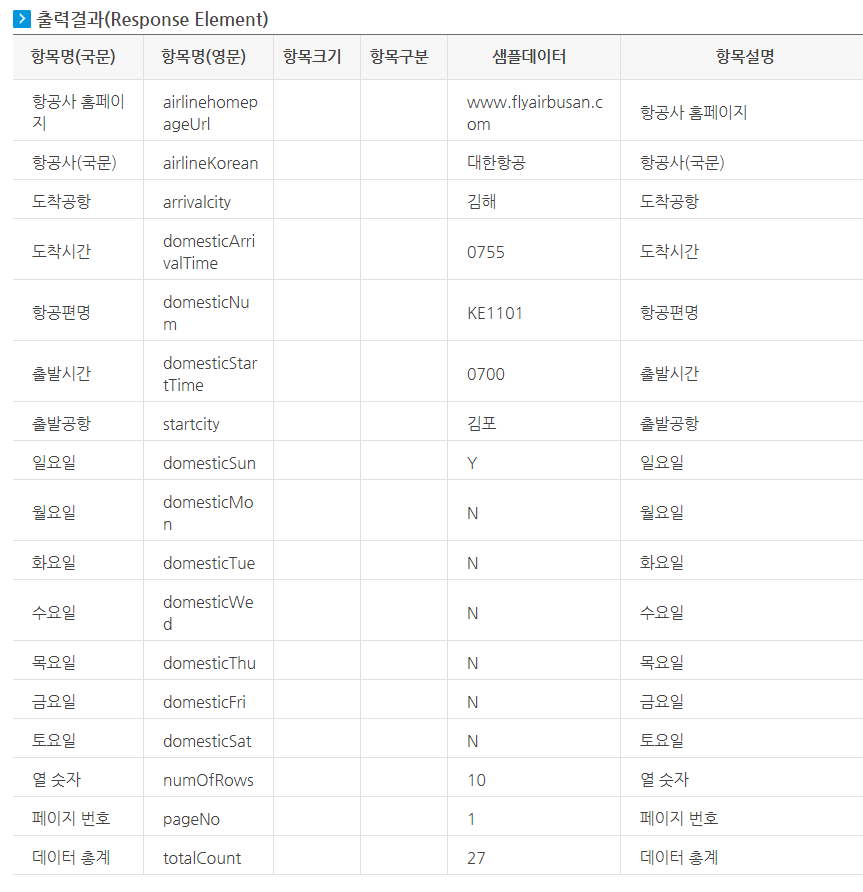

#### 김포공항(GMP)

In [103]:
api = 'http://openapi.airport.co.kr/service/rest/FlightScheduleList/getDflightScheduleList?serviceKey='
year = '&schDate=2018' #일단 2018년도만..
arrival = '&schArrtCityCode=GMP' #김포공항 도착
departure = '&schDeptCityCode=GMP' #김포공항 출발

url_dep = api + key + data_type +year+departure
url_arr = api + key + data_type +year+arrival


### 김포공항 출발

In [115]:
response = requests.get(url_dep)
response.status_code #200나오면 성공!

200

In [116]:
response.json()['response']['body']['totalCount']

199

In [106]:
columns = [*response.json()['response']['body']['items']['item'][0]]
columns

['airlineKorean',
 'arrivalcity',
 'domesticArrivalTime',
 'domesticEddate',
 'domesticFri',
 'domesticMon',
 'domesticNum',
 'domesticSat',
 'domesticStartTime',
 'domesticStdate',
 'domesticSun',
 'domesticThu',
 'domesticTue',
 'domesticWed',
 'startcity']

In [107]:
GMP_dep = pd.DataFrame(columns=columns)
GMP_dep

,airlineKorean,arrivalcity,domesticArrivalTime,domesticEddate,domesticFri,domesticMon,domesticNum,domesticSat,domesticStartTime,domesticStdate,domesticSun,domesticThu,domesticTue,domesticWed,startcity


In [108]:
#pageNo 1~20
No = list(map(str,list(range(1,21))))

for i in No :
    pageNo = '&pageNo=' + i
    url_dep = url_dep +pageNo
    response = requests.get(url_dep)
    print('pageNo:' + i, response.status_code) #200나오면 성공!
    
    json = response.json()['response']['body']['items']['item']
    dt = pd.DataFrame(columns=columns) #blank dataframe
    
    for col in columns :
        dt[col] = [x[col] for x in json]
    
    GMP_dep = pd.concat([GMP_dep, dt], axis = 0)

pageNo:1 200
pageNo:2 200
pageNo:3 200
pageNo:4 200
pageNo:5 200
pageNo:6 200
pageNo:7 200
pageNo:8 200
pageNo:9 200
pageNo:10 200
pageNo:11 200
pageNo:12 200
pageNo:13 200
pageNo:14 200
pageNo:15 200
pageNo:16 200
pageNo:17 200
pageNo:18 200
pageNo:19 200
pageNo:20 200


In [112]:
GMP_dep.head()

,airlineKorean,arrivalcity,domesticArrivalTime,domesticEddate,domesticFri,domesticMon,domesticNum,domesticSat,domesticStartTime,domesticStdate,domesticSun,domesticThu,domesticTue,domesticWed,startcity
0,아시아나항공,제주,0710,2018-03-24T00:00:00+09:00,Y,Y,OZ8901,Y,0605,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
1,아시아나항공,제주,0720,2018-03-24T00:00:00+09:00,Y,Y,OZ8905,Y,0615,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
2,진에어,제주,0735,2018-03-24T00:00:00+09:00,Y,Y,LJ301,Y,0620,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
3,이스타항공,제주,0730,2018-03-24T00:00:00+09:00,Y,Y,ZE201,Y,0620,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
4,티웨이항공,제주,0730,2018-03-24T00:00:00+09:00,N,N,TW731,N,0620,2017-10-29T00:00:00+09:00,N,N,N,Y,서울/김포


In [124]:
GMP_dep

,airlineKorean,arrivalcity,domesticArrivalTime,domesticEddate,domesticFri,domesticMon,domesticNum,domesticSat,domesticStartTime,domesticStdate,domesticSun,domesticThu,domesticTue,domesticWed,startcity
0,아시아나항공,제주,0710,2018-03-24T00:00:00+09:00,Y,Y,OZ8901,Y,0605,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
1,아시아나항공,제주,0720,2018-03-24T00:00:00+09:00,Y,Y,OZ8905,Y,0615,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
2,진에어,제주,0735,2018-03-24T00:00:00+09:00,Y,Y,LJ301,Y,0620,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
3,이스타항공,제주,0730,2018-03-24T00:00:00+09:00,Y,Y,ZE201,Y,0620,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
4,티웨이항공,제주,0730,2018-03-24T00:00:00+09:00,N,N,TW731,N,0620,2017-10-29T00:00:00+09:00,N,N,N,Y,서울/김포
5,아시아나항공,제주,0735,2018-03-24T00:00:00+09:00,N,N,OZ8403,Y,0625,2017-10-29T00:00:00+09:00,N,N,N,N,서울/김포
6,진에어,제주,0745,2018-03-24T00:00:00+09:00,Y,Y,LJ303,Y,0630,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
7,제주항공,제주,0740,2018-03-24T00:00:00+09:00,Y,Y,7C101,Y,0630,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
8,아시아나항공,제주,0740,2018-01-31T00:00:00+09:00,Y,Y,OZ8907,Y,0630,2017-11-22T00:00:00+09:00,Y,Y,Y,Y,서울/김포
9,아시아나항공,제주,0740,2018-03-24T00:00:00+09:00,N,N,OZ8403,N,0635,2017-10-29T00:00:00+09:00,Y,N,N,N,서울/김포


In [ ]:
GMP_dep.group

### 김포공항 도착

In [117]:
response = requests.get(url_arr)
response.status_code #200나오면 성공!

200

In [118]:
response.json()['response']['body']['totalCount']

664

In [119]:
columns = [*response.json()['response']['body']['items']['item'][0]]
columns

['airlineKorean',
 'arrivalcity',
 'domesticArrivalTime',
 'domesticEddate',
 'domesticFri',
 'domesticMon',
 'domesticNum',
 'domesticSat',
 'domesticStartTime',
 'domesticStdate',
 'domesticSun',
 'domesticThu',
 'domesticTue',
 'domesticWed',
 'startcity']

In [120]:
GMP_arr = pd.DataFrame(columns=columns)
GMP_arr

,airlineKorean,arrivalcity,domesticArrivalTime,domesticEddate,domesticFri,domesticMon,domesticNum,domesticSat,domesticStartTime,domesticStdate,domesticSun,domesticThu,domesticTue,domesticWed,startcity


In [121]:
#pageNo 1~67
No = list(map(str,list(range(1,68))))

for i in No :
    pageNo = '&pageNo=' + i
    url_arr = url_arr +pageNo
    response = requests.get(url_arr)
    print('pageNo:' + i, response.status_code) #200나오면 성공!
    
    json = response.json()['response']['body']['items']['item']
    dt = pd.DataFrame(columns=columns) #blank dataframe
    
    for col in columns :
        dt[col] = [x[col] for x in json]
    
    GMP_arr = pd.concat([GMP_arr, dt], axis = 0)

pageNo:1 200
pageNo:2 200
pageNo:3 200
pageNo:4 200
pageNo:5 200
pageNo:6 200
pageNo:7 200
pageNo:8 200
pageNo:9 200
pageNo:10 200
pageNo:11 200
pageNo:12 200
pageNo:13 200
pageNo:14 200
pageNo:15 200
pageNo:16 200
pageNo:17 200
pageNo:18 200
pageNo:19 200
pageNo:20 200
pageNo:21 200
pageNo:22 200
pageNo:23 200
pageNo:24 200
pageNo:25 200
pageNo:26 200
pageNo:27 200
pageNo:28 200
pageNo:29 200
pageNo:30 200
pageNo:31 200
pageNo:32 200
pageNo:33 200
pageNo:34 200
pageNo:35 200
pageNo:36 200
pageNo:37 200
pageNo:38 200
pageNo:39 200
pageNo:40 200
pageNo:41 200
pageNo:42 200
pageNo:43 200
pageNo:44 200
pageNo:45 200
pageNo:46 200
pageNo:47 200
pageNo:48 200
pageNo:49 200
pageNo:50 200
pageNo:51 200
pageNo:52 200
pageNo:53 200
pageNo:54 200
pageNo:55 200
pageNo:56 200
pageNo:57 200
pageNo:58 200
pageNo:59 200
pageNo:60 200
pageNo:61 200
pageNo:62 200
pageNo:63 200
pageNo:64 200
pageNo:65 200
pageNo:66 200
pageNo:67 200


In [122]:
GMP_arr.head()

,airlineKorean,arrivalcity,domesticArrivalTime,domesticEddate,domesticFri,domesticMon,domesticNum,domesticSat,domesticStartTime,domesticStdate,domesticSun,domesticThu,domesticTue,domesticWed,startcity
0,아시아나항공,제주,0710,2018-03-24T00:00:00+09:00,Y,Y,OZ8901,Y,0605,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
1,아시아나항공,제주,0720,2018-03-24T00:00:00+09:00,Y,Y,OZ8905,Y,0615,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
2,진에어,제주,0735,2018-03-24T00:00:00+09:00,Y,Y,LJ301,Y,0620,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
3,이스타항공,제주,0730,2018-03-24T00:00:00+09:00,Y,Y,ZE201,Y,0620,2017-10-29T00:00:00+09:00,Y,Y,Y,Y,서울/김포
4,티웨이항공,제주,0730,2018-03-24T00:00:00+09:00,N,N,TW731,N,0620,2017-10-29T00:00:00+09:00,N,N,N,Y,서울/김포
